In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\MLProjects\featureEngineering\Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = data.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
143,30,89000,0
368,38,71000,0
82,20,49000,0
20,45,22000,1
390,48,33000,1


In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=1)

In [8]:
xtrain,xtest

(     Age  EstimatedSalary
 39    27            31000
 167   35            71000
 383   49            28000
 221   35            91000
 351   37            75000
 ..   ...              ...
 255   52            90000
 72    20            23000
 396   51            23000
 235   46            79000
 37    30            49000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 398   36            33000
 125   39            61000
 328   36           118000
 339   39           122000
 172   26           118000
 ..   ...              ...
 91    30           116000
 322   41            52000
 248   41            52000
 186   20            82000
 395   46            41000
 
 [120 rows x 2 columns])

In [9]:
ytest,ytrain

(398    0
 125    0
 328    1
 339    1
 172    0
       ..
 91     0
 322    0
 248    0
 186    0
 395    1
 Name: Purchased, Length: 120, dtype: int64,
 39     0
 167    0
 383    1
 221    1
 351    0
       ..
 255    1
 72     0
 396    1
 235    1
 37     0
 Name: Purchased, Length: 280, dtype: int64)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [11]:
print(xtest_scaled)

[[-0.1066347  -1.0522259 ]
 [ 0.18418721 -0.23512496]
 [-0.1066347   1.42825909]
 [ 0.18418721  1.54498779]
 [-1.07604106  1.42825909]
 [ 0.08724657 -0.11839626]
 [-1.65768487 -0.96467937]
 [ 1.15359356  0.58197597]
 [-0.59133788 -1.48995855]
 [ 1.05665293  2.09944914]
 [-0.30051597  0.08587898]
 [ 0.18418721  0.11506115]
 [-0.20357533  0.08587898]
 [ 1.05665293  1.80762738]
 [ 1.54135611  0.37770074]
 [ 1.83217801  1.86599173]
 [ 2.21994056  0.40688292]
 [-0.97910042 -0.32267149]
 [-0.88215978  0.52361162]
 [ 2.21994056  0.96134427]
 [ 0.28112784  0.17342551]
 [ 1.2505342   0.5527938 ]
 [ 0.66889039  2.04108479]
 [ 0.95971229 -0.76040414]
 [ 0.76583102 -1.25650114]
 [-1.07604106 -1.57750508]
 [ 2.02605929 -0.64367543]
 [ 1.15359356  0.14424333]
 [ 1.54135611 -1.02304373]
 [ 1.44441547  1.31153038]
 [ 0.18418721 -0.78958631]
 [-1.75462551  0.20260768]
 [-1.85156614  0.49442945]
 [ 1.92911865  0.14424333]
 [-0.97910042  0.43606509]
 [-0.68827851  0.31933639]
 [-1.4638036  -1.48995855]
 

In [12]:
xtrain_scaled = pd.DataFrame(xtrain_scaled,columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled,columns=xtest.columns)

In [13]:
print(xtrain_scaled)

          Age  EstimatedSalary
0   -0.979100        -1.110590
1   -0.203575         0.056697
2    1.153594        -1.198137
3   -0.203575         0.640340
4   -0.009694         0.173426
..        ...              ...
275  1.444415         0.611158
276 -1.657685        -1.344048
277  1.347475        -1.344048
278  0.862772         0.290154
279 -0.688279        -0.585311

[280 rows x 2 columns]


In [14]:
print(np.round(xtrain.describe(),1))
print(np.round(xtrain_scaled.describe(),1))

         Age  EstimatedSalary
count  280.0            280.0
mean    37.1          69057.1
std     10.3          34328.8
min     18.0          15000.0
25%     29.0          43000.0
50%     37.0          67000.0
75%     43.5          85000.0
max     60.0         150000.0
         Age  EstimatedSalary
count  280.0            280.0
mean    -0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.0             -0.1
75%      0.6              0.5
max      2.2              2.4


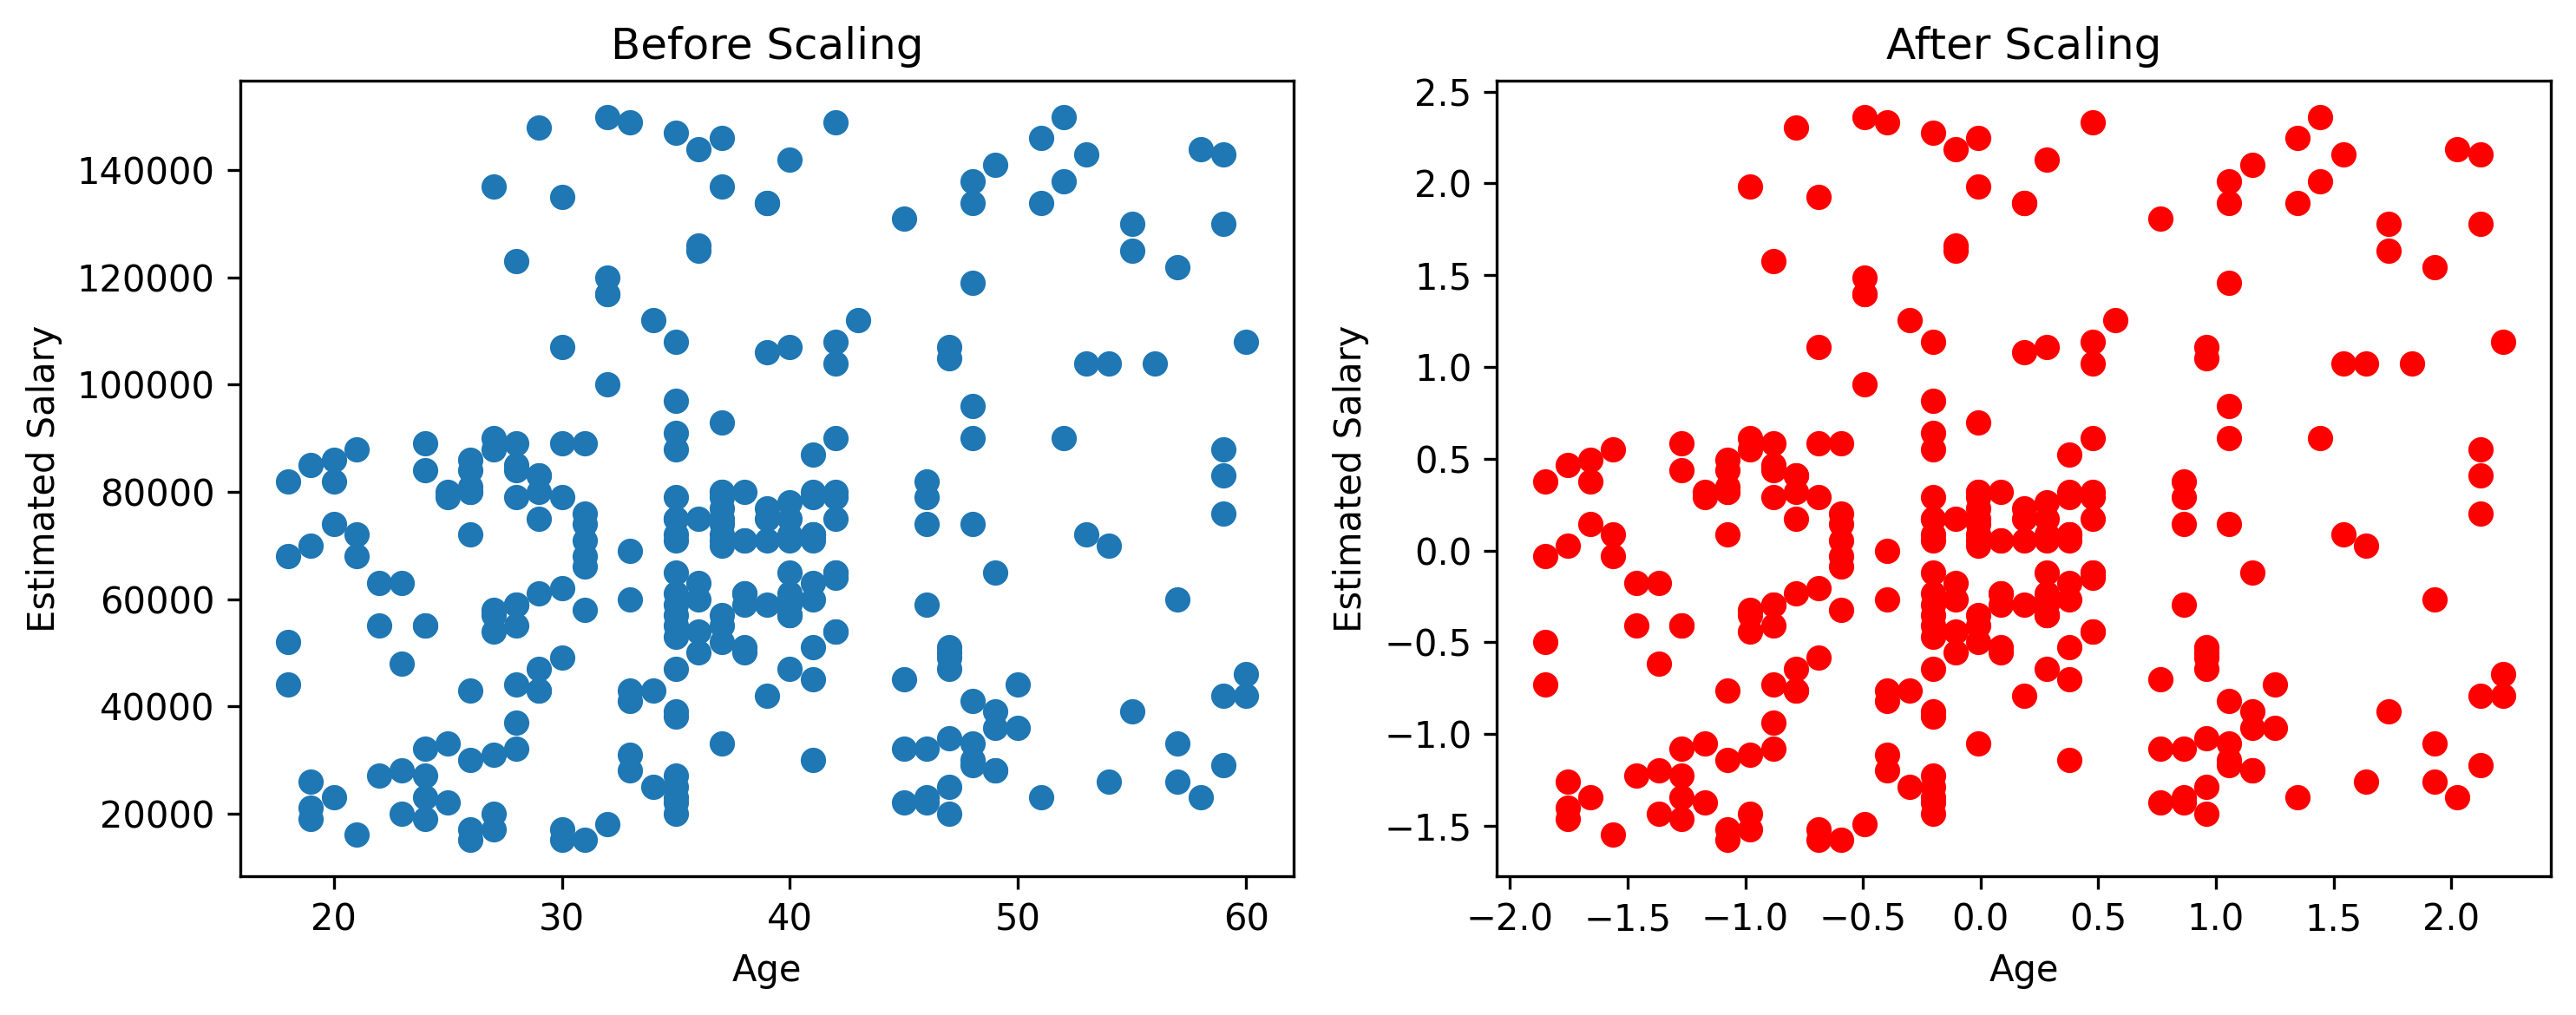

In [15]:
plt.figure(figsize=(10,4),dpi=300)
plt.subplot(1,2,1)
plt.scatter(xtrain['Age'],xtrain['EstimatedSalary'])
plt.title('Before Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.subplot(1,2,2)
plt.scatter(xtrain_scaled['Age'],xtrain_scaled['EstimatedSalary'], color='red')
plt.title('After Scaling')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.tight_layout()
plt.show()

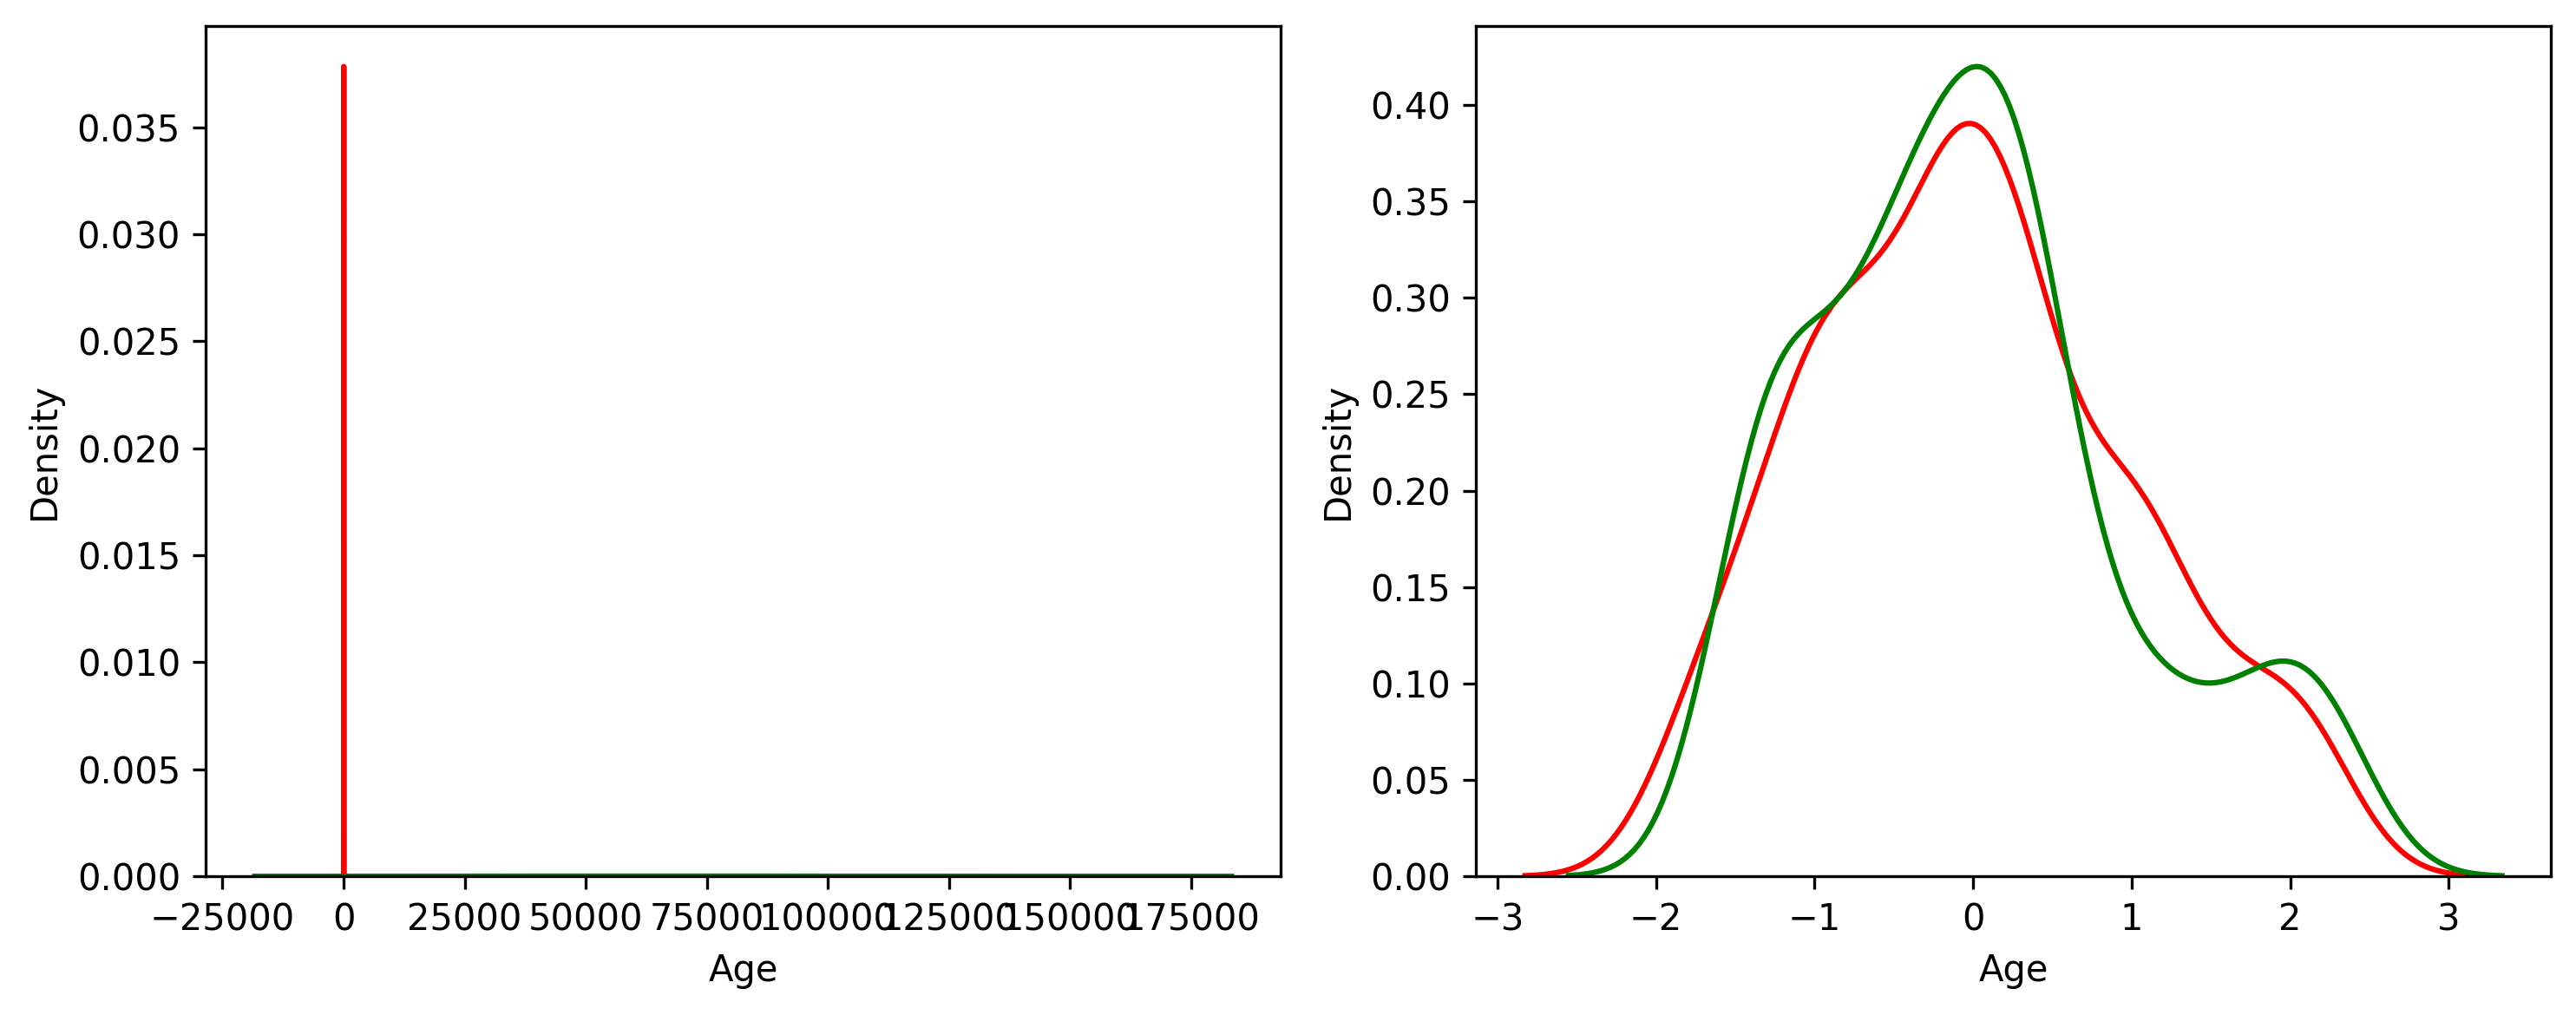

In [16]:
plt.figure(figsize=(10,4),dpi=300)
plt.subplot(1,2,1)
sns.kdeplot(xtrain['Age'],color='r')
sns.kdeplot(xtrain['EstimatedSalary'],color='g')

plt.subplot(1,2,2)
sns.kdeplot(xtrain_scaled['Age'],color='r')
sns.kdeplot(xtrain_scaled['EstimatedSalary'],color='g')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print('Actual accuracy score',accuracy_score(ytest,ypred))


lr_scaled = LogisticRegression()
lr_scaled.fit(xtrain_scaled,ytrain)
ypred_scaled = lr_scaled.predict(xtest_scaled)
print('Scaled accuracy score',accuracy_score(ytest,ypred_scaled))

Actual accuracy score 0.825
Scaled accuracy score 0.825
